# Metric Calculations for Diabetic Retinopathy Images

In [1]:
!pip install sewar

  Created wheel for sewar: filename=sewar-0.4.4-py3-none-any.whl size=10389 sha256=3066a74337c25c18a5e759673af7cb83ffe8ed1aa31c677d32d868021db90168
  Stored in directory: /root/.cache/pip/wheels/b5/00/df/f1ba40d0d44c95b0db52804e518c128d5631866b91ea1960ba
Successfully built sewar


In [2]:
## Load all the necessary packages

%matplotlib inline

import matplotlib.pyplot as plt
import skimage.transform
from skimage import data, io, filters
import numpy as np
from numpy import array
from skimage.transform import rescale, resize
from skimage.transform import resize
import os
import PIL
import pandas as pd
import imageio
import sewar

from matplotlib.pyplot import imread
import cv2

In [3]:
## Load Directory Paths

def load_path(path):
    directories = []
    if os.path.isdir(path):
        print('directory path: ', path)
        directories.append(path)
    for elem in os.listdir(path): #check for nested dir within parent dir
        if os.path.isdir(os.path.join(path,elem)):
            print('inside nested dir')
            directories = directories + load_path(os.path.join(path,elem))
            directories.append(os.path.join(path,elem))
    print('directories: ', directories)
    return directories

In [4]:
## Load Images from directory

def load_data_from_dirs(dirs, ext):
    files = []
    file_names = []
    count = 0
    res = {}
    
    for d in dirs:
        for f in os.listdir(d):
            if f.endswith(ext):
                image = cv2.imread(os.path.join(d,f))
                files.append(image)
                file_names.append(os.path.join(d,f))
                count = count + 1
                res[int(os.path.join(d,f)[39:-5])] = image
    
    print('list of files: ',len(files))
    print('list of files path: ', len(file_names), 'file path: ', file_names[0])
    print('Files Read: ',count)
    
    return res

In [5]:
## Load Images

def load_data(directory, ext):
    files = load_data_from_dirs(load_path(directory), ext)
    return files

In [6]:
## Load HR Images from directory
print(len("../input/espcn-drd-metric/HR_0_imgs/"))
hr_normal_imgs = load_data("../input/espcn-drd-metric/HR_0_imgs/", ".jpeg")

36
directory path:  ../input/espcn-drd-metric/HR_0_imgs/
directories:  ['../input/espcn-drd-metric/HR_0_imgs/']
list of files:  200
list of files path:  200 file path:  ../input/espcn-drd-metric/HR_0_imgs/HR_19.jpeg
Files Read:  200


In [7]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_hr_normal_imgs = OrderedDict(sorted(hr_normal_imgs.items()))

In [8]:
## Function to display UMat images

def displayImages(img_arr):    
    width=8
    height=8
    rows = 3
    cols = 4
    axes=[]

    fig=plt.figure(figsize=(10,10))

    for i in range(rows * cols):
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("Image: "+str(i+1))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img_arr[i+1])
        plt.axis('off')
    fig.tight_layout()    
    plt.show()

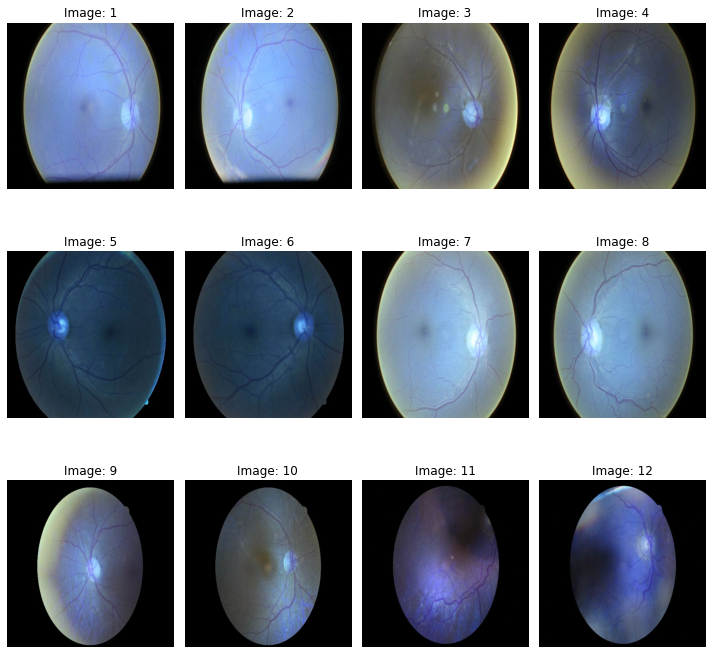

In [9]:
## Visualize few chest x-ray images

displayImages(srt_hr_normal_imgs)

In [10]:
## Load SR Images from directory

sr_normal_imgs = load_data("../input/espcn-drd-metric/SR_0_imgs/", ".jpeg")

directory path:  ../input/espcn-drd-metric/SR_0_imgs/
directories:  ['../input/espcn-drd-metric/SR_0_imgs/']
list of files:  200
list of files path:  200 file path:  ../input/espcn-drd-metric/SR_0_imgs/SR_103.jpeg
Files Read:  200


In [11]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_sr_normal_imgs = OrderedDict(sorted(sr_normal_imgs.items()))

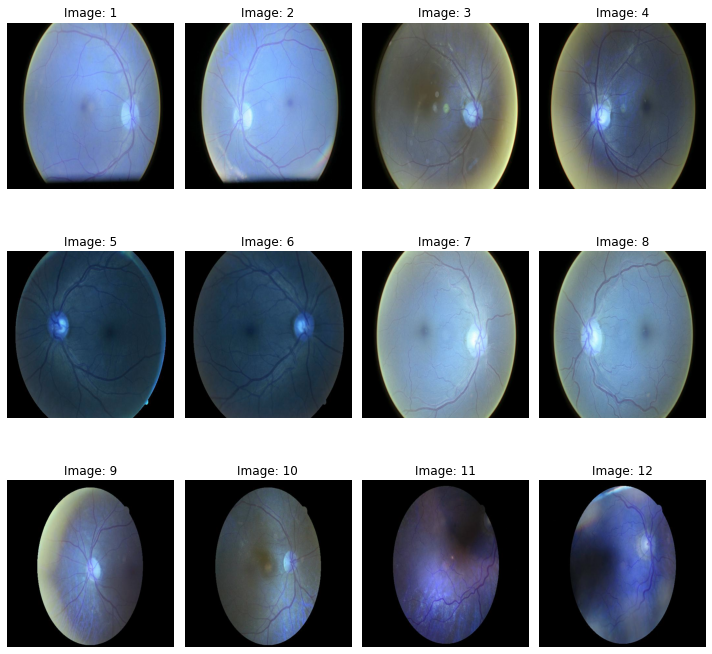

In [12]:
## Visualize few chest x-ray images

displayImages(srt_sr_normal_imgs)

## Computing Metrics for Normal Images

In [13]:
espcn_drd_metric = {}
espcn_drd_metric["normal_img"] = {}
espcn_drd_metric["diseased_img"] = {}
espcn_drd_metric["mannwhitneyu"] = {}

## Computing SSIM

In [14]:
## Compute SSIM for single image

ans = sewar.full_ref.ssim(srt_sr_normal_imgs[2],srt_hr_normal_imgs[2])[0]
print(ans)

0.9645567096784252


In [15]:
ssim_normal_arr = []
for i in range(1,201):
    ssim_normal_arr.append(sewar.full_ref.ssim(srt_sr_normal_imgs[i],srt_hr_normal_imgs[i])[0])
    
## Display Results for starting 10 images

print(ssim_normal_arr[:10])

[0.9697854269831515, 0.9645567096784252, 0.9697988735614592, 0.9715757946597326, 0.9777511964298276, 0.9777103288191215, 0.967369550758289, 0.9673468818261693, 0.9787727336380003, 0.9541163420465987]


In [16]:
ssim_normal_mean, ssim_normal_std = np.mean(ssim_normal_arr), np.std(ssim_normal_arr)
espcn_drd_metric["normal_img"]["ssim"] = ssim_normal_arr
print(ssim_normal_mean, ssim_normal_std)

0.9711557347814158 0.008147040423515457


In [17]:
# def displayResults(img_arr1, img_arr2,ssim_arr, metric, dim=(1, 3), figsize=(15, 5)):    
#     width=8
#     height=8
#     rows = 5
#     cols = 5
#     axes=[]

#     fig=plt.figure(figsize=(10,10))

#     for i in range(rows * cols):
#         plt.figure(figsize=figsize)

#         plt.subplot(dim[0], dim[1], 1)
#         plt.imshow(img_arr1[i+1], interpolation='nearest', cmap='gray')
#         plt.title(f"Super Resolution Image {i+1}")
#         plt.axis('off')

#         plt.subplot(dim[0], dim[1], 2)
#         plt.imshow(img_arr2[i+1], interpolation='nearest', cmap='gray')
#         plt.title(f"Origial Image {i+1}")
#         plt.axis('off')
        
#         plt.subplot(dim[0], dim[1], 3)
#         plt.text(0.5, 0.5,f"{metric} {ssim_arr[i]}")
#         plt.axis('off')
        
#     fig.tight_layout()    
#     plt.show()

In [18]:
# displayResults(srt_sr_normal_imgs, srt_hr_normal_imgs, ssim_normal_arr, "SSIM")

## Mean Absolute Error

In [19]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [20]:
print(MAE(srt_sr_normal_imgs[11], srt_hr_normal_imgs[11]))

1.1444091796875e-05


In [21]:
mae_normal_arr=[]
for i in range(1, 201):
    mae_normal_arr.append(MAE(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
print(mae_normal_arr[:10])

[0.0010960896809895833, 0.009579976399739584, 7.120768229166667e-05, 0.0003636678059895833, 2.9246012369791668e-05, 1.0172526041666666e-05, 0.001651763916015625, 0.0012969970703125, 0.00025177001953125, 1.2715657552083333e-06]


In [22]:
mae_normal_mean, mae_normal_std = np.mean(mae_normal_arr), np.std(mae_normal_arr)
espcn_drd_metric["normal_img"]["mae"] = mae_normal_arr
print("mean: ", mae_normal_mean, " std: ", mae_normal_std)

mean:  0.001904112497965495  std:  0.006160165338152898


## Mean Percentage Error

In [23]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [24]:
print(MPE(srt_sr_normal_imgs[5], srt_hr_normal_imgs[5]))

0.002924601236979167


In [25]:
mpe_normal_arr=[]
for i in range(1, 201):
    mpe_normal_arr.append(MPE(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
print(mpe_normal_arr[:10])

[0.10960896809895833, 0.9579976399739584, 0.007120768229166667, 0.03636678059895833, 0.002924601236979167, 0.0010172526041666665, 0.1651763916015625, 0.12969970703125, 0.025177001953125, 0.00012715657552083332]


In [26]:
mpe_normal_mean, mpe_normal_std = np.mean(mpe_normal_arr), np.std(mpe_normal_arr)
espcn_drd_metric["normal_img"]["mpe"] = mpe_normal_arr
print("mean: ", mpe_normal_mean, " std: ", mpe_normal_std)

mean:  0.1904112497965495  std:  0.6160165338152898


### Mean Square Error

In [27]:
ans = sewar.full_ref.mse(srt_sr_normal_imgs[21], srt_hr_normal_imgs[21])
print(ans, type(ans))

8.807669321695963 <class 'numpy.float64'>


In [28]:
mse_normal_arr = []
for i in range(1,201):
    mse_normal_arr.append(sewar.full_ref.mse(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images

print(mse_normal_arr[:10])

[6.160010019938151, 6.3544921875, 6.120938618977864, 6.075955708821614, 6.459158579508464, 4.421059926350911, 6.772355397542317, 6.912092844645183, 5.8410491943359375, 7.513863881429036]


In [29]:
mse_normal_mean, mse_normal_std = np.mean(mse_normal_arr), np.std(mse_normal_arr)
espcn_drd_metric["normal_img"]["mse"] = mse_normal_arr
print("mean: ", mse_normal_mean, " std: ", mse_normal_std)

mean:  6.490263315836589  std:  4.403978028440176


### Root Mean Square Error

In [30]:
ans = sewar.full_ref.rmse(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

2.520811811202891 <class 'numpy.float64'>


In [31]:
rmse_normal_arr = []
for i in range(1,201):
    rmse_normal_arr.append(sewar.full_ref.rmse(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images

print(rmse_normal_arr[:10])

[2.4819367477714156, 2.520811811202891, 2.474053075214407, 2.464945376437704, 2.5414874738051463, 2.1026316668287177, 2.602374953295992, 2.629085933294152, 2.4168262648225127, 2.741142805734323]


In [32]:
rmse_normal_mean, rmse_normal_std = np.mean(rmse_normal_arr), np.std(rmse_normal_arr)
espcn_drd_metric["normal_img"]["rmse"] = rmse_normal_arr
print("mean: ", rmse_normal_mean, " std: ", rmse_normal_std)

mean:  2.4785523716097666  std:  0.5891022466636756


### PSNR

In [33]:
ans = sewar.full_ref.psnr(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

40.099995107738664 <class 'numpy.float64'>


In [34]:
psnr_normal_arr = []
for i in range(1,201):
    psnr_normal_arr.append(sewar.full_ref.psnr(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images
print(psnr_normal_arr[:10])

[40.23498942274863, 40.099995107738664, 40.26262336469665, 40.29465761490933, 40.02904413782565, 41.67553959170103, 39.82340620063389, 39.73470797825564, 40.46589496908876, 39.372170375985846]


In [35]:
psnr_normal_mean, psnr_normal_std = np.mean(psnr_normal_arr), np.std(psnr_normal_arr)
espcn_drd_metric["normal_img"]["psnr"] = psnr_normal_arr
print("mean: ", psnr_normal_mean, " std: ", psnr_normal_std)

mean:  40.42368555321769  std:  1.647233143234221


### Multi-Scale Structural Similarity Index (MS-SSIM)

In [36]:
ans = sewar.full_ref.msssim(srt_sr_normal_imgs[5], srt_hr_normal_imgs[5])
print(ans, type(ans))

(0.9897158653145798+0j) <class 'numpy.complex128'>


In [37]:
msssim_normal_arr = []
for i in range(1,201):
    msssim_normal_arr.append(sewar.full_ref.msssim(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]).real)
    
## Display Results for starting 10 images
print(msssim_normal_arr[:10])

[0.9889975435403369, 0.9896012339017339, 0.9894245003812101, 0.9905930734927643, 0.9897158653145798, 0.989746364217304, 0.9891981857843625, 0.9888785168791894, 0.9934091855221888, 0.9863442930681108]


In [38]:
msssim_normal_mean, msssim_normal_std = np.mean(msssim_normal_arr), np.std(msssim_normal_arr)
espcn_drd_metric["normal_img"]["msssim"] = msssim_normal_arr
print("mean: ", msssim_normal_mean,  " std: ", msssim_normal_std)

mean:  0.9904845616146509  std:  0.002080998194576622


### Spatial Corelation Coefficient (SCC)

In [39]:
ans = sewar.full_ref.scc(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

0.4548073198978391 <class 'numpy.float64'>


In [40]:
scc_normal_arr = []
for i in range(1,201):
    scc_normal_arr.append(sewar.full_ref.scc(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images

print(scc_normal_arr[:10])

[0.40052975913293865, 0.4548073198978391, 0.42176756720003844, 0.510196315861264, 0.4747353166902786, 0.4486323937564116, 0.5059517575669908, 0.5154597390370785, 0.2784815764983083, 0.23841092559405272]


In [41]:
scc_normal_mean, scc_normal_std = np.mean(scc_normal_arr), np.std(scc_normal_arr)
espcn_drd_metric["normal_img"]["scc"] = scc_normal_arr
print("mean: ", scc_normal_mean,  " std: ", scc_normal_std)

mean:  0.40238732125492516  std:  0.1015829987054903


### Pixel Based Visual Information Fidelity (vif-p)

In [42]:
ans = sewar.full_ref.vifp(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

0.7027865289416928 <class 'numpy.float64'>


In [43]:
vifp_normal_arr = []
for i in range(1,201):
    vifp_normal_arr.append(sewar.full_ref.vifp(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images
print(vifp_normal_arr[:10])

[0.6931699929723455, 0.7027865289416928, 0.7028133543189629, 0.6996237146540333, 0.668999795203035, 0.6651949974797032, 0.6775709759606462, 0.6747088403139757, 0.6698668031711564, 0.5367821749252838]


In [44]:
vifp_normal_mean, vifp_normal_std = np.mean(vifp_normal_arr), np.std(vifp_normal_arr)
espcn_drd_metric["normal_img"]["vifp"] = vifp_normal_arr
print("mean: ", vifp_normal_mean,  " std: ", vifp_normal_std)

mean:  0.6643814980750132  std:  0.04373787121912163


In [45]:
# os.mkdir('./normal')
# os.mkdir('./pneumonia')

In [46]:
# os.mkdir('./normal/error_barplot')
# os.mkdir('./normal/scatter')
# os.mkdir('./normal/regression')

# os.mkdir('./pneumonia/error_barplot')
# os.mkdir('./pneumonia/scatter')
# os.mkdir('./pneumonia/regression')

### Visualizing Metrics for Normal Images

In [47]:
# ## Define error bar plot function

# def error_barplot(error_arr,title='', file_name=''):
    
#     # Calculate the average
#     error_mean = np.mean(error_arr)
    
#     # Calculate the standard deviation
#     error_std = np.std(error_arr)

#     # Define labels, positions, bar heights and error bar heights
#     labels = ['For 200 Images']
#     x_pos = np.arange(len(labels))
#     CTEs = [error_mean]
#     error = [error_std]
    
#     # Build the plot
#     fig, ax = plt.subplots(figsize=(5,5))
#     ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
# #     ax.set_ylabel('Mean Percentage Error')
#     ax.set_xticks(x_pos)
#     ax.set_xticklabels(labels)
#     ax.set_title(title)
#     ax.yaxis.grid(True)
    
#     plt.savefig(f"./normal/error_barplot/{file_name}.png")

#     # Save the figure and show
#     plt.tight_layout()
#     # plt.savefig('bar_plot_with_error_bars.png')
#     plt.show()

In [48]:
# error_barplot(mae_normal_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

In [49]:
# error_barplot(mpe_normal_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

In [50]:
# error_barplot(mse_normal_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

In [51]:
# error_barplot(rmse_normal_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

In [52]:
# error_barplot(psnr_normal_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

In [53]:
# error_barplot(ssim_normal_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

In [54]:
# error_barplot(msssim_normal_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

In [55]:
# error_barplot(scc_normal_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

In [56]:
# error_barplot(vifp_normal_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

## Scatter Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

In [57]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':(8,8)})

In [58]:
# metric_dict = {'Images': [i for i in range(1,201)],
#             'MAE' : mae_normal_arr,
#             'MPE' : mpe_normal_arr,
#             'MSE' : mse_normal_arr,
#             'RMSE' : rmse_normal_arr,
#             'PSNR' : psnr_normal_arr,
#             'SSIM' : ssim_normal_arr,
#             'MSSSIM' : msssim_normal_arr,
#             'SCC' : scc_normal_arr,
#             'VIFP' : vifp_normal_arr
#          }
# metric_df = pd.DataFrame(metric_dict)

In [59]:
# def getScatterPlot(y_val,df,title='', file_name=''):
    
#     sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
#     sns_fig = sns_plt.get_figure()
#     sns_fig.savefig(f"./normal/scatter/{file_name}.png")

In [60]:
# def RegPlot(y_val,df,title='', file_name=''):
    
#     sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
#     sns_fig = sns_plt.get_figure()
#     sns_fig.savefig(f"./normal/regression/{file_name}.png")

In [61]:
# getScatterPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

In [62]:
# getScatterPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

In [63]:
# getScatterPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

In [64]:
# getScatterPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

In [65]:
# getScatterPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

In [66]:
# getScatterPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

In [67]:
# getScatterPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

In [68]:
# getScatterPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

In [69]:
# getScatterPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

In [70]:
# RegPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

In [71]:
# RegPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

In [72]:
# RegPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

In [73]:
# RegPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

In [74]:
# RegPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

In [75]:
# RegPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

In [76]:
# RegPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

In [77]:
# RegPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

In [78]:
# RegPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

## Metric Calculations for Diseased Images

In [79]:
## Load Images from directory

def load_data_from_dirs(dirs, ext):
    files = []
    file_names = []
    count = 0
    res = {}
    
    for d in dirs:
        for f in os.listdir(d):
            if f.endswith(ext):
                image = cv2.imread(os.path.join(d,f))
                files.append(image)
                file_names.append(os.path.join(d,f))
                count = count + 1
                res[int(os.path.join(d,f)[39:-5])] = image
    
    print('list of files: ',len(files))
    print('list of files path: ', len(file_names), 'file path: ', file_names[0])
    print('Files Read: ',count)
    
    return res

In [80]:
## Load HR Images from directory
print(len('../input/espcn-drd-metric/HR_1_imgs/'))
hr_pneumonia_imgs = load_data("../input/espcn-drd-metric/HR_1_imgs/", ".jpeg")

36
directory path:  ../input/espcn-drd-metric/HR_1_imgs/
directories:  ['../input/espcn-drd-metric/HR_1_imgs/']
list of files:  203
list of files path:  203 file path:  ../input/espcn-drd-metric/HR_1_imgs/HR_19.jpeg
Files Read:  203


In [81]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_hr_pneumonia_imgs = OrderedDict(sorted(hr_pneumonia_imgs.items()))

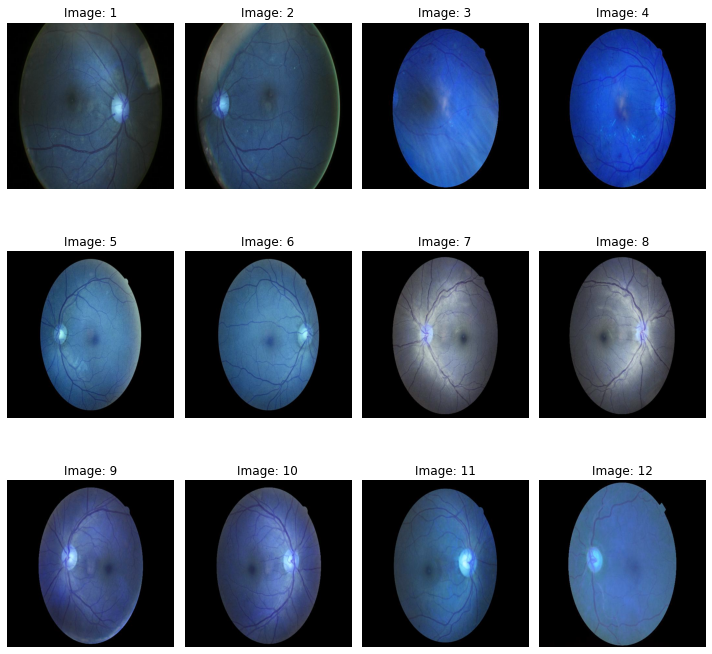

In [82]:
## Visualize few chest x-ray images

displayImages(srt_hr_pneumonia_imgs)

In [83]:
## Load SR Images from directory

sr_pneumonia_imgs = load_data("../input/espcn-drd-metric/SR_1_imgs/", ".jpeg")

directory path:  ../input/espcn-drd-metric/SR_1_imgs/
directories:  ['../input/espcn-drd-metric/SR_1_imgs/']
list of files:  203
list of files path:  203 file path:  ../input/espcn-drd-metric/SR_1_imgs/SR_103.jpeg
Files Read:  203


In [84]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_sr_pneumonia_imgs = OrderedDict(sorted(sr_pneumonia_imgs.items()))

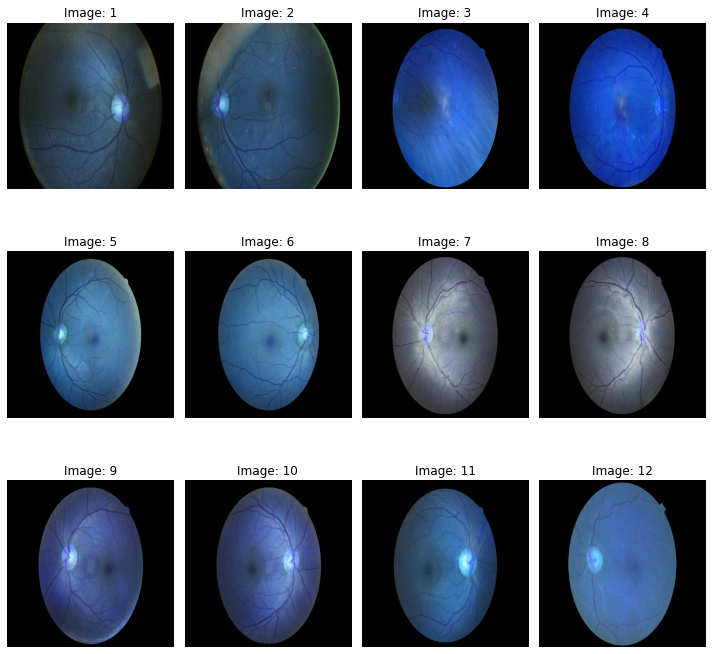

In [85]:
## Visualize few chest x-ray images

displayImages(srt_sr_pneumonia_imgs)

## Metric Calculations for Diseased Images

### SSIM

In [86]:
sewar.full_ref.ssim(srt_sr_pneumonia_imgs[12],srt_hr_pneumonia_imgs[12])[0]

0.9773311228266589

In [87]:
ssim_pneumonia_arr = []
for i in range(1,201):
    ssim_pneumonia_arr.append(sewar.full_ref.ssim(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i])[0])
print(ssim_pneumonia_arr[:10])

[0.9668476841659213, 0.9663722230728121, 0.969958152705678, 0.9773844082408826, 0.9628145292503648, 0.9697964512271283, 0.9776299051443896, 0.9791219973676341, 0.9825385245471344, 0.9820311898551258]


In [88]:
ssim_pneumonia_mean, ssim_pneumonia_std = np.mean(ssim_pneumonia_arr), np.std(ssim_pneumonia_arr)
espcn_drd_metric["diseased_img"]["ssim"] = ssim_pneumonia_arr
print(ssim_pneumonia_mean, ssim_pneumonia_std)

0.9699412576821979 0.014976658487360057


## Mean Absolute Error (MAE)

In [89]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [90]:
MAE(srt_sr_pneumonia_imgs[2],srt_hr_pneumonia_imgs[2])

1.2715657552083334e-05

In [91]:
mae_pneumonia_arr = []
for i in range(1,201):
    mae_pneumonia_arr.append(MAE(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(mae_pneumonia_arr[:10])

[7.62939453125e-06, 1.2715657552083334e-05, 3.814697265625e-06, 5.4677327473958336e-05, 1.3987223307291666e-05, 3.814697265625e-05, 5.5948893229166664e-05, 5.340576171875e-05, 0.00021107991536458334, 0.00032806396484375]


In [92]:
mae_pneumonia_mean, mae_pneumonia_std = np.mean(mae_pneumonia_arr), np.std(mae_pneumonia_arr)
espcn_drd_metric["diseased_img"]["mae"] = mae_pneumonia_arr
print(mae_pneumonia_mean, mae_pneumonia_std)

0.0016877174377441407 0.0072633170256053295


### Mean Absolute Percentage Error (MAPE)

In [93]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [94]:
MPE(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])

0.0003814697265625

In [95]:
mpe_pneumonia_arr = []
for i in range(1,201):
    mpe_pneumonia_arr.append(MPE(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(mpe_pneumonia_arr[:10])

[0.000762939453125, 0.0012715657552083335, 0.0003814697265625, 0.005467732747395834, 0.0013987223307291665, 0.003814697265625, 0.005594889322916666, 0.005340576171875, 0.021107991536458336, 0.032806396484375]


In [96]:
mpe_pneumonia_mean, mpe_pneumonia_std = np.mean(mpe_pneumonia_arr), np.std(mpe_pneumonia_arr)
espcn_drd_metric["diseased_img"]["mpe"] = mpe_pneumonia_arr
print(mpe_pneumonia_mean, mpe_pneumonia_std)

0.16877174377441406 0.7263317025605328


### Mean Square Error (MSE)

In [97]:
ans = sewar.full_ref.mse(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

4.933957417805989 <class 'numpy.float64'>


In [98]:
mse_pneumonia_arr = []
for i in range(1,201):
    mse_pneumonia_arr.append(sewar.full_ref.mse(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(mse_pneumonia_arr[:10])

[4.38180414835612, 4.71478271484375, 4.933957417805989, 3.8039766947428384, 6.528299967447917, 4.942189534505208, 5.083599090576172, 4.970981597900391, 4.539549509684245, 4.499855041503906]


In [99]:
mse_pneumonia_mean, mse_pneumonia_std = np.mean(mse_pneumonia_arr), np.std(mse_pneumonia_arr)
espcn_drd_metric["diseased_img"]["mse"] = mse_pneumonia_arr
print(mse_pneumonia_mean, mse_pneumonia_std)

6.674276854197185 13.054700812390495


### Root Mean Square Error (RMSE)

In [100]:
ans = sewar.full_ref.rmse(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

2.2212513180200903 <class 'numpy.float64'>


In [101]:
rmse_pneumonia_arr = []
for i in range(1,201):
    rmse_pneumonia_arr.append(sewar.full_ref.rmse(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(rmse_pneumonia_arr[:10])

[2.0932759369839706, 2.171355041176765, 2.2212513180200903, 1.9503786029237602, 2.5550538091100776, 2.223103581596055, 2.2546838116632166, 2.2295698235086494, 2.130621859853185, 2.1212861762392894]


In [102]:
rmse_pneumonia_mean, rmse_pneumonia_std = np.mean(rmse_pneumonia_arr), np.std(rmse_pneumonia_arr)
espcn_drd_metric["diseased_img"]["rmse"] = rmse_pneumonia_arr
print(rmse_pneumonia_mean, rmse_pneumonia_std)

2.3991500727910897 0.9583088137044827


### PSNR

In [103]:
ans = sewar.full_ref.psnr(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

41.198849638478954 <class 'numpy.float64'>


In [104]:
psnr_pneumonia_arr = []
for i in range(1,201):
    psnr_pneumonia_arr.append(sewar.full_ref.psnr(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(psnr_pneumonia_arr[:10])

[41.71427398685913, 41.396186781993976, 41.198849638478954, 42.32842513321668, 39.982802593601015, 41.191609641540666, 41.069090675335175, 41.16638205442673, 41.560676038622546, 41.59881837245669]


In [105]:
psnr_pneumonia_mean, psnr_pneumonia_std = np.mean(psnr_pneumonia_arr), np.std(psnr_pneumonia_arr)
espcn_drd_metric["diseased_img"]["psnr"] = psnr_pneumonia_arr
print(psnr_pneumonia_mean, psnr_pneumonia_std)

40.82293379903924 1.912229473201793


### Multi-Scale Structure Similarity Index MS-SSIM

In [106]:
ans = sewar.full_ref.msssim(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

(0.989540975556233+0j) <class 'numpy.complex128'>


In [107]:
msssim_pneumonia_arr = []
for i in range(1,201):
    msssim_pneumonia_arr.append(sewar.full_ref.msssim(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]).real)
print(msssim_pneumonia_arr[:10])

[0.9889052355912759, 0.9883093112812686, 0.989540975556233, 0.9907266194173046, 0.9891707522307099, 0.9911113484454787, 0.9939607229315769, 0.9939520763916821, 0.9940724759374479, 0.9941351189935973]


In [108]:
msssim_pneumonia_mean, msssim_pneumonia_std = np.mean(msssim_pneumonia_arr), np.std(msssim_pneumonia_arr)
espcn_drd_metric["diseased_img"]["msssim"] = msssim_pneumonia_arr
print(msssim_pneumonia_mean, msssim_pneumonia_std)

0.990599459148337 0.002910892686107664


### Spatial Corelation Coefficient (SCC)

In [109]:
ans = sewar.full_ref.scc(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

0.23344254719706348 <class 'numpy.float64'>


In [110]:
scc_pneumonia_arr = []
for i in range(1,201):
    scc_pneumonia_arr.append(sewar.full_ref.scc(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(scc_pneumonia_arr[:10])

[0.47712208020764835, 0.45199098821805234, 0.23344254719706348, 0.3216761316894134, 0.2656463594077793, 0.277312958477625, 0.35490997213009723, 0.3526495425649381, 0.3264109148197204, 0.3274777828522113]


In [111]:
scc_pneumonia_mean, scc_pneumonia_std = np.mean(scc_pneumonia_arr), np.std(scc_pneumonia_arr)
espcn_drd_metric["diseased_img"]["scc"] = scc_pneumonia_arr
print(scc_pneumonia_mean, scc_pneumonia_std)

0.37913744226871765 0.10476319706811595


### Pixel Based Visual Information Fidelity (vif-p)

In [112]:
ans = sewar.full_ref.vifp(srt_sr_pneumonia_imgs[10],srt_hr_pneumonia_imgs[10])
print(ans, type(ans))

0.6961662809467155 <class 'numpy.float64'>


In [113]:
vifp_pneumonia_arr = []
for i in range(1,201):
    vifp_pneumonia_arr.append(sewar.full_ref.vifp(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(vifp_pneumonia_arr[:10])

[0.6630819587100548, 0.6521466482815356, 0.6075156888007108, 0.6621191648559505, 0.5762787270624824, 0.6071611575585012, 0.6721510461681608, 0.6792252671516336, 0.696881144041829, 0.6961662809467155]


In [114]:
vifp_pneumonia_mean, vifp_pneumonia_std = np.mean(vifp_pneumonia_arr), np.std(vifp_pneumonia_arr)
espcn_drd_metric["diseased_img"]["vifp"] = vifp_pneumonia_arr
print(vifp_pneumonia_mean, vifp_pneumonia_std)

0.6649173788347378 0.053933849731617724


## Computing Mann Whitney U-Test

In [115]:
from scipy.stats import mannwhitneyu
res = {}
for k1, k2 in zip(espcn_drd_metric["normal_img"].keys(),espcn_drd_metric["diseased_img"].keys()):
    res[k1] = {}
    res[k1]["stat"], res[k1]["p_value"] = mannwhitneyu(espcn_drd_metric["normal_img"][k1], espcn_drd_metric["diseased_img"][k2])
    espcn_drd_metric["mannwhitneyu"] = res
print(espcn_drd_metric["mannwhitneyu"])

{'ssim': {'stat': 18310.0, 'p_value': 0.07196321778883706}, 'mae': {'stat': 17473.0, 'p_value': 0.014425030994005468}, 'mpe': {'stat': 17473.0, 'p_value': 0.014425030994005468}, 'mse': {'stat': 15644.0, 'p_value': 8.25220632213233e-05}, 'rmse': {'stat': 15644.0, 'p_value': 8.25220632213233e-05}, 'psnr': {'stat': 15644.0, 'p_value': 8.25220632213233e-05}, 'msssim': {'stat': 17629.0, 'p_value': 0.020165052678105724}, 'scc': {'stat': 17358.0, 'p_value': 0.011163688381041642}, 'vifp': {'stat': 19646.0, 'p_value': 0.3798944464046793}}


## Save Results

In [116]:
import pickle

with open('./espcn_drd_metric.pkl', 'wb') as f:
    pickle.dump(espcn_drd_metric, f)

In [117]:
import json

with open('./espcn_drd_metric.json', 'w') as f:
    json.dump(espcn_drd_metric, f)

## Visualizing Error Barplots for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [118]:
# ## Define error bar plot function

# def error_barplot(error_arr,title='', file_name=''):
    
#     # Calculate the average
#     error_mean = np.mean(error_arr)
    
#     # Calculate the standard deviation
#     error_std = np.std(error_arr)

#     # Define labels, positions, bar heights and error bar heights
#     labels = ['For 200 Images']
#     x_pos = np.arange(len(labels))
#     CTEs = [error_mean]
#     error = [error_std]
    
#     # Build the plot
#     fig, ax = plt.subplots(figsize=(5,5))
#     ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
# #     ax.set_ylabel('Mean Percentage Error')
#     ax.set_xticks(x_pos)
#     ax.set_xticklabels(labels)
#     ax.set_title(title)
#     ax.yaxis.grid(True)
    
#     plt.savefig(f"./pneumonia/error_barplot/{file_name}.png")

#     # Save the figure and show
#     plt.tight_layout()
#     # plt.savefig('bar_plot_with_error_bars.png')
#     plt.show()

In [119]:
# error_barplot(mae_pneumonia_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

In [120]:
# error_barplot(mpe_pneumonia_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

In [121]:
# error_barplot(mse_pneumonia_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

In [122]:
# error_barplot(rmse_pneumonia_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

In [123]:
# error_barplot(psnr_pneumonia_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

In [124]:
# error_barplot(ssim_pneumonia_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

In [125]:
# error_barplot(msssim_pneumonia_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

In [126]:
# error_barplot(scc_pneumonia_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

In [127]:
# error_barplot(vifp_pneumonia_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

## Scatter Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [128]:
# metric_dict_pneumonia = {'Images': [i for i in range(1,201)],
#             'MAE' : mae_pneumonia_arr,
#             'MPE' : mpe_pneumonia_arr,
#             'MSE' : mse_pneumonia_arr,
#             'RMSE' : rmse_pneumonia_arr,
#             'PSNR' : psnr_pneumonia_arr,
#             'SSIM' : ssim_pneumonia_arr,
#             'MSSSIM' : msssim_pneumonia_arr,
#             'SCC' : scc_pneumonia_arr,
#             'VIFP' : vifp_pneumonia_arr
#          }
# metric_df_pneumonia = pd.DataFrame(metric_dict_pneumonia)

In [129]:
# def getScatterPlot(y_val,df,title='', file_name=''):
    
#     sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
#     sns_fig = sns_plt.get_figure()
#     sns_fig.savefig(f"./pneumonia/scatter/{file_name}.png")

In [130]:
# def RegPlot(y_val,df,title='', file_name=''):
    
#     sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
#     sns_fig = sns_plt.get_figure()
#     sns_fig.savefig(f"./pneumonia/regression/{file_name}.png")

In [131]:
# getScatterPlot(metric_df_pneumonia.MAE, metric_df_pneumonia, 'Mean Absolute Error', 'mae_scatter')

In [132]:
# getScatterPlot(metric_df_pneumonia.MPE, metric_df_pneumonia, title='Mean Percentage Error', file_name='mpe_scatter')

In [133]:
# getScatterPlot(metric_df_pneumonia.MSE, metric_df_pneumonia, title='Mean Square Error', file_name='mse_scatter')

In [134]:
# getScatterPlot(metric_df_pneumonia.RMSE, metric_df_pneumonia, title='Root Mean Square Error', file_name='rmse_scatter')

In [135]:
# getScatterPlot(metric_df_pneumonia.PSNR, metric_df_pneumonia, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

In [136]:
# getScatterPlot(metric_df_pneumonia.SSIM, metric_df_pneumonia, title='Structure Similarity Index', file_name='ssim_scatter')

In [137]:
# getScatterPlot(metric_df_pneumonia.MSSSIM, metric_df_pneumonia, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

In [138]:
# getScatterPlot(metric_df_pneumonia.SCC, metric_df_pneumonia, title='Spatial Corelation Coefficient', file_name='scc_scatter')

In [139]:
# getScatterPlot(metric_df_pneumonia.VIFP, metric_df_pneumonia, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [140]:
# RegPlot(metric_df_pneumonia.MAE, metric_df_pneumonia, 'Mean Absolute Error', 'mae_scatter')

In [141]:
# RegPlot(metric_df_pneumonia.MPE, metric_df_pneumonia, title='Mean Percentage Error', file_name='mpe_scatter')

In [142]:
# RegPlot(metric_df_pneumonia.MSE, metric_df_pneumonia, title='Mean Square Error', file_name='mse_scatter')

In [143]:
# RegPlot(metric_df_pneumonia.RMSE, metric_df_pneumonia, title='Root Mean Square Error', file_name='rmse_scatter')

In [144]:
# RegPlot(metric_df_pneumonia.PSNR, metric_df_pneumonia, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

In [145]:
# RegPlot(metric_df_pneumonia.SSIM, metric_df_pneumonia, title='Structure Similarity Index', file_name='ssim_scatter')

In [146]:
# RegPlot(metric_df_pneumonia.MSSSIM, metric_df_pneumonia, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

In [147]:
# RegPlot(metric_df_pneumonia.SCC, metric_df_pneumonia, title='Spatial Corelation Coefficient', file_name='scc_scatter')

In [148]:
# RegPlot(metric_df_pneumonia.VIFP, metric_df_pneumonia, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

In [149]:
# %%!

# zip -r normal.zip ./normal

In [150]:
# %%!

# zip -r pneumonia.zip ./pneumonia